In [2]:
import sys
import cv2
import os
import math
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [11]:
max_num_node = 24
canvas_size = 660

flip_bird = [1,3,2,4,5,6,8,7,11,12,9,10,13]
flip_cow = [1,3,2,5,4,6,8,7,9,10,13,14,11,12,17,18,15,16,19]
flip_cat = [1,3,2,5,4,6,7,8,11,12,9,10,15,16,13,14,17]
flip_dog = [1,3,2,5,4,6,7,8,11,12,9,10,15,16,13,14,17,18]
flip_horse = [1,3,2,5,4,6,8,7,9,10,13,14,11,12,17,18,15,16,19,21,20]
flip_person = [1,3,2,5,4,7,6,8,9,10,11,12,16,17,18,13,14,15,22,23,24,19,20,21]
flip_sheep = flip_cow

person_tree = {}
person_tree[0] = [1,2,3,4,7,8,9,10,11]
person_tree[1] = [0,2,3,5,7]
person_tree[2] = [0,1,4,6,7]
person_tree[3] = [0,1]
person_tree[4] = [0,2]
person_tree[5] = [1]
person_tree[6] = [2]
person_tree[7] = [0,1,2,8]
person_tree[8] = [0,7]
person_tree[9] = [0]
person_tree[10] = [0,11,13,16,19,22]
person_tree[11] = [0,10]
person_tree[12] = [13,14]
person_tree[13] = [10,12]
person_tree[14] = [12]
person_tree[15] = [16,17]
person_tree[16] = [10,15]
person_tree[17] = [15]
person_tree[18] = [19,20]
person_tree[19] = [18,10]
person_tree[20] = [18]
person_tree[21] = [22,23]
person_tree[22] = [21,10]
person_tree[23] = [21]

bird_tree = {}
bird_tree[0] = [1,2,3,4,5]
bird_tree[1] = [0,2,3]
bird_tree[2] = [0,1,3]
bird_tree[3] = [0,1,2]
bird_tree[4] = [0,5,6,7,8,10,12]
bird_tree[5] = [0,4]
bird_tree[6] = [7,4]
bird_tree[7] = [6,4]
bird_tree[8] = [4,9]
bird_tree[9] = [8]
bird_tree[10] = [11,4]
bird_tree[11] = [10]
bird_tree[12] = [4] 

dog_tree = {}
dog_tree[0] = [1,2,3,4,5,6,7,17]
dog_tree[1] = [2,0,3]
dog_tree[2] = [0,1,4]
dog_tree[3] = [0,1]
dog_tree[4] = [0,2]
dog_tree[5] = [0,1,2]
dog_tree[6] = [0,8,10,12,14,16,7]
dog_tree[7] = [0,6]
dog_tree[8] = [9,6]
dog_tree[9] = [8]
dog_tree[10] = [6,11]
dog_tree[11] = [10]
dog_tree[12] = [13,6]
dog_tree[13] = [12]
dog_tree[14] = [6,15]
dog_tree[15] = [14]
dog_tree[16] = [6]
dog_tree[17] = [0]

cat_tree = {}
cat_tree[0] = [1,2,3,4,5,6,7]
cat_tree[1] = [2,0,3]
cat_tree[2] = [0,1,4]
cat_tree[3] = [0,1]
cat_tree[4] = [0,2]
cat_tree[5] = [0,1,2]
cat_tree[6] = [0,8,10,12,14,16,7]
cat_tree[7] = [0,6]
cat_tree[8] = [9,6]
cat_tree[9] = [8]
cat_tree[10] = [6,11]
cat_tree[11] = [10]
cat_tree[12] = [13,6]
cat_tree[13] = [12]
cat_tree[14] = [6,15]
cat_tree[15] = [14]
cat_tree[16] = [6]

horse_tree = {}
horse_tree[0] = [1,2,3,4,5,8,9]
horse_tree[1] = [2,0,3]
horse_tree[2] = [0,1,4]
horse_tree[3] = [0,1]
horse_tree[4] = [0,2]
horse_tree[5] = [0,1,2]
horse_tree[6] = [11] #lfho
horse_tree[7] = [13] #rfho
horse_tree[8] = [0,10,12,14,16,18]
horse_tree[9] = [0,8]
horse_tree[10] = [8,11,12]
horse_tree[11] = [10,6]
horse_tree[12] = [10,8,13]
horse_tree[13] = [7]
horse_tree[14] = [8,15,16]
horse_tree[15] = [14,19]
horse_tree[16]= [14,17]
horse_tree[17]= [16,20]
horse_tree[18]= [8]
horse_tree[19] = [15]
horse_tree[20] = [17]

cow_tree = {}
cow_tree[0] = [1,2,3,4,5,6,7,8,9]
cow_tree[1] = [2,0,3,5]
cow_tree[2] = [0,1,4,5]
cow_tree[3] = [0,1,6]
cow_tree[4] = [0,2,7]
cow_tree[5] = [0,1,2]
cow_tree[6] = [0,3] #lfho
cow_tree[7] = [0,4,13] #rfho
cow_tree[8] = [0,9,10,12,14,16,18]
cow_tree[9] = [0,8]
cow_tree[10] = [8,11,12]
cow_tree[11] = [10,6]
cow_tree[12] = [10,8,13]
cow_tree[13] = [7,12]
cow_tree[14] = [8,15,16]
cow_tree[15] = [14]
cow_tree[16]= [8,14,17]
cow_tree[17]= [16]
cow_tree[18]= [8]

motorbike_tree = {}
motorbike_tree[0] = [14,1,2]
motorbike_tree[1] = [14,0]
motorbike_tree[2] = [14,0]
motorbike_tree[3] = [14]
motorbike_tree[4] = [14]
motorbike_tree[5] = [14]
motorbike_tree[6] = [14]
motorbike_tree[7] = [14]
motorbike_tree[8] = [14]
motorbike_tree[9] = [14]
motorbike_tree[10]= [14]
motorbike_tree[11]= [14]
motorbike_tree[12]= [14]
motorbike_tree[13]= [14]
motorbike_tree[14]= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

bicycle_tree = {}
bicycle_tree[0] = [15,1,3]
bicycle_tree[1] = [15,0,2,4]
bicycle_tree[2] = [15,1]
bicycle_tree[3] = [15,0]
bicycle_tree[4] = [15,1]
bicycle_tree[5] = [15]
bicycle_tree[6] = [15]
bicycle_tree[7] = [15]
bicycle_tree[8] = [15]
bicycle_tree[9] = [15]
bicycle_tree[10]= [15]
bicycle_tree[11]= [15]
bicycle_tree[12]= [15]
bicycle_tree[13]= [15]
bicycle_tree[14]= [15]
bicycle_tree[15]= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

aeroplane_tree = {}
aeroplane_tree[0] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
aeroplane_tree[1] = [0]
aeroplane_tree[2] = [0,3]
aeroplane_tree[3] = [0,2]
aeroplane_tree[4] = [0]
aeroplane_tree[5] = [0]
aeroplane_tree[6] = [0]
aeroplane_tree[7] = [0]
aeroplane_tree[8] = [0]
aeroplane_tree[9] = [0]
aeroplane_tree[10]= [0]
aeroplane_tree[11]= [0]
aeroplane_tree[12]= [0]
aeroplane_tree[13]= [0]
aeroplane_tree[14]= [0]
aeroplane_tree[15]= [0]
aeroplane_tree[16]= [0]
aeroplane_tree[17]= [0]
aeroplane_tree[18]= [0]
aeroplane_tree[19]= [0]
aeroplane_tree[20]= [0]
aeroplane_tree[21]= [0]
aeroplane_tree[22]= [0]

tree = { 'aeroplane':aeroplane_tree, 'motorbike':motorbike_tree,'bicycle':bicycle_tree, 'person':person_tree, 'cow':cow_tree, 'dog':dog_tree, 'cat':cat_tree, 'sheep':cow_tree, 'bird':bird_tree, 'horse':horse_tree }

object_names = ['cow','sheep','bird','person','cat','dog','horse','aeroplane','motorbike','bicycle']

class_dic = {'cow':0,'sheep':1,'bird':2,'person':3,'cat':4,'dog':5,'horse':6,'aeroplane':7,'motorbike':8,'bicycle':9,'car':10}

def get_pos(bbx):
    temp_pos = []
    for i in bbx:
        if i.tolist()!=[0,0,0,0]:
            temp_pos.append([1])
        elif i.tolist()==[0,0,0,0]:
            temp_pos.append([0])
            
    return np.asarray(temp_pos)

#colors = [(229,184,135), (0,0,255), (0,255,0),(255,0,0),(0,255,255),(255,255,0),(255,0,255),(130,0,75),(0,128,128),(128,128,0),(128,128,128),(0,0,0),(30,105,210),(30,105//2,210//2),(180,105,255),(180//2,105//2,255),(100,100,30),(0,100//2,20),(128,0,128),(30,105,210),(255//2,105,255),(180//2,105,255//2),(50,100,0), (229//2,184,135//2),(229,184,135), (0,0,255), (0,255,0),(255,0,0),(0,255,255),(255,255,0),(255,0,255),(130,0,75),(0,128,128),(128,128,0),(128,128,128),(0,0,0),(30,105,210),(30,105//2,210//2),(180,105,255),(180//2,105//2,255),(100,100,30),(0,100//2,20),(128,0,128),(30,105,210),(255//2,105,255),(180//2,105,255//2),(50,100,0), (229//2,184,135//2)]
colors = [(1, 0, 0),
          (0.737, 0.561, 0.561),
          (0.255, 0.412, 0.882),
          (0.545, 0.271, 0.0745),
          (0.98, 0.502, 0.447),
          (0.98, 0.643, 0.376),
          (0.18, 0.545, 0.341),
          (0.502, 0, 0.502),
          (0.627, 0.322, 0.176),
          (0.753, 0.753, 0.753),
          (0.529, 0.808, 0.922),
          (0.416, 0.353, 0.804),
          (0.439, 0.502, 0.565),
          (0.784, 0.302, 0.565),
          (0.867, 0.627, 0.867),
          (0, 1, 0.498),
          (0.275, 0.51, 0.706),
          (0.824, 0.706, 0.549),
          (0, 0.502, 0.502),
          (0.847, 0.749, 0.847),
          (1, 0.388, 0.278),
          (0.251, 0.878, 0.816),
          (0.933, 0.51, 0.933),
          (0.961, 0.871, 0.702)]
colors = (np.asarray(colors)*255)


label_to_color = {0:(0,0,0),
                    1:(0.941, 0.973, 1),
                    2:(0.98, 0.922, 0.843),
                    3:(0, 1, 1),
                    4:(0.498, 1, 0.831),
                    5:(0.941, 1, 1),
                    6:(0.961, 0.961, 0.863),
                    7:(1, 0.894, 0.769),
                    8:(0.251, 0.878, 0.816),
                    9:(1, 0.388, 0.278),
                    10:(0, 0, 1),
                    11:(0.541, 0.169, 0.886),
                    12:(0.647, 0.165, 0.165),
                    13:(0.871, 0.722, 0.529),
                    14:(0.373, 0.62, 0.627),
                    15:(0.498, 1, 0),
                    16:(0.824, 0.412, 0.118),
                    17:(1, 0.498, 0.314),
                    18:(0.392, 0.584, 0.929),
                    19:(0.275, 0.51, 0.706),
                    20:(0.863, 0.0784, 0.235),
                    21:(0, 1, 1),
                    22:(0, 0, 0.545),
                    23:(0.824, 0.706, 0.549),
                    24:(0.251, 0.878, 0.816)}



In [4]:
def plot_all_boxes(images):
    plots = len(images)
    figure = plt.figure(figsize=(20, 10))
    for i, img in enumerate(images):
        plt.subplot(int(np.ceil(plots/5)), 5, i+1)
        plt.xlim(0, canvas_size)
        plt.ylim(0, canvas_size)
        for box in img:
            x_min, y_min, x_max, y_max = box
            plt.plot([x_min, x_max, x_max, x_min, x_min],
                     [y_min, y_min, y_max, y_max, y_min]
                    )
    plt.show()
            

In [12]:
class_v = {}
X_train = {}
adj_train = {}
path = "D:\\meronym_data\\data\\"

for object_name in object_names:
    print(object_name)
#     with open(path+object_name+'_images', 'rb') as f:
#       o_images = pickle.load(f)
    with open(path+object_name+'_part_separated_labels', 'rb') as f:
      o_labels = pickle.load(f)
    with open(path+object_name+'_part_separated_masks', 'rb') as f:
      o_masks = pickle.load(f)
    with open(path+object_name+'_part_separated_bbx', 'rb') as f:
      o_bbx = pickle.load(f)

    train_set_limit = int(len(o_bbx)*(75/100))
    validation_set_limit = int(len(o_bbx)*(10/100))
    test_set_limit = int(len(o_bbx)*(15/100))

    label = o_labels[:train_set_limit]
    box = o_bbx[:train_set_limit]
    mask = o_masks[:train_set_limit]
    #image = o_images[0:train_set_limit]

    label_val = o_labels[train_set_limit:train_set_limit+validation_set_limit]
    box_val = o_bbx[train_set_limit:train_set_limit+validation_set_limit]
    mask_val = o_masks[train_set_limit:train_set_limit+validation_set_limit]
    #image_val = o_images[train_set_limit:train_set_limit+validation_set_limit]

    label_test = o_labels[train_set_limit+validation_set_limit::]
    box_test = o_bbx[train_set_limit+validation_set_limit::]
    mask_test = o_masks[train_set_limit+validation_set_limit::]
    #image_test = o_images[train_set_limit+validation_set_limit::]

    max_parts = len(label[0])

    flipped_label = []
    flipped_box = []
    flipped_mask = []
    flipped_image = []

    angle = 5

    for l,b,m in zip(label,  box, mask):
        ll, bb, mm = flip_data_instance(l,b,m)
        flipped_label.append(ll)
        flipped_box.append(bb)
        flipped_mask.append(mm)
        #flipped_image.append(ii)

    flipped_label = np.asarray(flipped_label)
    flipped_box =   np.asarray(flipped_box )
    flipped_mask =  np.asarray(flipped_mask)
    #flipped_image = np.asarray(flipped_image)

    label = np.concatenate((label, flipped_label), axis = 0)
    box = np.concatenate((box, flipped_box), axis = 0)
    mask = np.concatenate((mask, flipped_mask), axis = 0)
    #image = np.concatenate((image, flipped_image), axis = 0)
    rt_box = []
    for bx, mx in zip(box, mask):
      bbxx1 = render_mask(bx,mx,angle)
      bbxx2 = render_mask(bx,mx,-angle)
      rt_box.append(bbxx1)
      rt_box.append(bbxx2)

    rt_box = np.asarray(rt_box)
    box = box = np.concatenate((box, rt_box), axis = 0)

    centre_box = []
    for bx in box:
      centre_box.append(centre_object(bx, (canvas_size,canvas_size)))

    centre_box = np.asarray(centre_box)
    box = centre_box
    scale_box = []
    for bx in box:
      a,b,c,d = scale(bx, 0.05)
      scale_box.append(a)
      scale_box.append(b)
      scale_box.append(c)
      scale_box.append(d)

    scale_box = np.asarray(scale_box)
    box = np.concatenate((box, scale_box), axis = 0)

    box = append_labels(box)
    box = pad_along_axis(box, 24, axis=1)
    
    numparts = 24

    final_input = []
    for i,x in enumerate(box):
      l = numparts
      temp = np.zeros((l,l), dtype=np.float32)
      for j in range(l):
        temp[j][j] = 1
        if x[j][0] == 1:
          for y in tree[object_name][j]:
            if x[y][0] == 1:
              temp[j][y] = 1
              temp[y][j] = 1
      final_input.append(temp)
    adj = np.asarray(final_input)

    class_v[object_name] = (np.asarray([np.eye(10)[class_dic[object_name]]]*len(box)))
    X_train[object_name] = (box)
    adj_train[object_name] = (adj)


cclass_v = np.concatenate((
class_v['cow'],
class_v['person'],
class_v['cat'],
class_v['dog'],
class_v['horse'],
class_v['sheep'],
class_v['bird'],
class_v['aeroplane'],
class_v['motorbike'],
class_v['bicycle']), axis = 0)


cadj_train = np.concatenate((
adj_train['cow'],
adj_train['person'],
adj_train['cat'],
adj_train['dog'],
adj_train['horse'],
adj_train['sheep'],
adj_train['bird'],
adj_train['aeroplane'],
adj_train['motorbike'],
adj_train['bicycle']), axis = 0)


cX_train = np.concatenate((
X_train['cow'],
X_train['person'],
X_train['cat'],
X_train['dog'],
X_train['horse'],
X_train['sheep'],
X_train['bird'],
X_train['aeroplane'],
X_train['motorbike'],
X_train['bicycle']), axis = 0)


X_train = cX_train
class_v = cclass_v
adj_train = cadj_train

cow
sheep
bird
person
cat
dog
horse
aeroplane
motorbike
bicycle


In [17]:
class_v_val = {}
X_train_val = {}
adj_train_val = {}

for object_name in object_names:
    print(object_name)
    with open(path+object_name+'_part_separated_labels', 'rb') as f:
      o_labels = pickle.load(f)
    with open(path+object_name+'_part_separated_masks', 'rb') as f:
      o_masks = pickle.load(f)
    with open(path+object_name+'_part_separated_bbx', 'rb') as f:
      o_bbx = pickle.load(f)

    train_set_limit = int(len(o_bbx)*(75/100))
    validation_set_limit = int(len(o_bbx)*(10/100))
    test_set_limit = int(len(o_bbx)*(15/100))

    #label = o_labels[0:train_set_limit]
    #box = o_bbx[0:train_set_limit]
    #mask = o_masks[0:train_set_limit]
    #image = o_images[0:train_set_limit]
    
    label = o_labels[train_set_limit:train_set_limit+validation_set_limit]
    box = o_bbx[train_set_limit:train_set_limit+validation_set_limit]
    mask = o_masks[train_set_limit:train_set_limit+validation_set_limit]
    #image = o_images[train_set_limit:train_set_limit+validation_set_limit]

    #label_test = o_labels[train_set_limit+validation_set_limit::]
    #box_test = o_bbx[train_set_limit+validation_set_limit::]
    #mask_test = o_masks[train_set_limit+validation_set_limit::]
    #image_test = o_images[train_set_limit+validation_set_limit::]

    max_parts = len(label[0])

    flipped_label = []
    flipped_box = []
    flipped_mask = []
    #flipped_image = []

    angle = 5

    for l,b,m in zip(label,  box, mask):
        ll, bb, mm = flip_data_instance(l,b,m)
        flipped_label.append(ll)
        flipped_box.append(bb)
        flipped_mask.append(mm)
        

    flipped_label = np.asarray(flipped_label)
    flipped_box =   np.asarray(flipped_box )
    flipped_mask =  np.asarray(flipped_mask)
    #flipped_image = np.asarray(flipped_image)

    label = np.concatenate((label, flipped_label), axis = 0)
    box = np.concatenate((box, flipped_box), axis = 0)
    mask = np.concatenate((mask, flipped_mask), axis = 0)
    #image = np.concatenate((image, flipped_image), axis = 0)

    rt_box = []
    for bx, mx in zip(box, mask):
      bbxx1 = render_mask(bx,mx,angle)
      bbxx2 = render_mask(bx,mx,-angle)
      rt_box.append(bbxx1)
      rt_box.append(bbxx2)

    rt_box = np.asarray(rt_box)
    box = box = np.concatenate((box, rt_box), axis = 0)

    centre_box = []
    for bx in box:
      centre_box.append(centre_object(bx, (canvas_size,canvas_size)))

    centre_box = np.asarray(centre_box)
    box = centre_box

    scale_box = []
    for bx in box:
      a,b,c,d = scale(bx, 0.05)
      scale_box.append(a)
      scale_box.append(b)
      scale_box.append(c)
      scale_box.append(d)

    scale_box = np.asarray(scale_box)
    box = np.concatenate((box, scale_box), axis = 0)

    box = append_labels(box)
    box = pad_along_axis(box, 24, axis=1)
    
    numparts = 24

    final_input = []

    for i,x in enumerate(box):
      l = numparts
      temp = np.zeros((l,l), dtype=np.float32)
      for j in range(l):
        temp[j][j] = 1
        if x[j][0] == 1:
          for y in tree[object_name][j]:
            if x[y][0] == 1:
              temp[j][y] = 1
              temp[y][j] = 1
      final_input.append(temp)
    adj = np.asarray(final_input)

    class_v_val[object_name] = (np.asarray([np.eye(10)[class_dic[object_name]]]*len(box)))
    X_train_val[object_name] = (box)
    adj_train_val[object_name] = (adj)

cclass_v_val = np.concatenate((
class_v_val['cow'],
class_v_val['person'],
class_v_val['cat'],
class_v_val['dog'],
class_v_val['horse'],
class_v_val['sheep'],
class_v_val['bird'],
class_v_val['aeroplane'],
class_v_val['bicycle'],
class_v_val['motorbike']), axis = 0)

cadj_train_val = np.concatenate((
adj_train_val['cow'],
adj_train_val['person'],
adj_train_val['cat'],
adj_train_val['dog'],
adj_train_val['horse'],
adj_train_val['sheep'],
adj_train_val['bird'],
adj_train_val['aeroplane'],
adj_train_val['bicycle'],
adj_train_val['motorbike']), axis = 0)


cX_train_val = np.concatenate((
X_train_val['cow'],
X_train_val['person'],
X_train_val['cat'],
X_train_val['dog'],
X_train_val['horse'],
X_train_val['sheep'],
X_train_val['bird'],
X_train_val['aeroplane'],
X_train_val['bicycle'],
X_train_val['motorbike']), axis = 0)


X_train_val = cX_train_val
class_v_val = cclass_v_val
adj_train_val = cadj_train_val

X_train.shape, X_train_val.shape, class_v.shape, class_v_val.shape, adj_train.shape, adj_train_val.shape

outfile = 'D:/meronym_data/X_train.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(X_train, pickle_file)

outfile = 'D:/meronym_data/X_train_val.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(X_train_val,pickle_file)

outfile = 'D:/meronym_data/class_v.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(class_v,pickle_file)

outfile = 'D:/meronym_data/class_v_val.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(class_v_val,pickle_file)

outfile = 'D:/meronym_data/adj_train.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(adj_train,pickle_file)

outfile = 'D:/meronym_data/adj_train_val.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(adj_train_val,pickle_file)

cow
sheep
bird
person
cat
dog
horse
aeroplane
motorbike
bicycle


In [18]:
class_v_test = {}
X_train_test = {}
adj_train_test = {}
path = "D:\\meronym_data\\data\\"

for object_name in object_names:
    print(object_name)
    with open(path+object_name+'_part_separated_labels', 'rb') as f:
      o_labels = pickle.load(f)
    with open(path+object_name+'_part_separated_masks', 'rb') as f:
      o_masks = pickle.load(f)
    with open(path+object_name+'_part_separated_bbx', 'rb') as f:
      o_bbx = pickle.load(f)

    train_set_limit = int(len(o_bbx)*(75/100))
    validation_set_limit = int(len(o_bbx)*(10/100))
    test_set_limit = int(len(o_bbx)*(15/100))

    #label = o_labels[0:train_set_limit]
    #box = o_bbx[0:train_set_limit]
    #mask = o_masks[0:train_set_limit]
    #image = o_images[0:train_set_limit]
    
    label = o_labels[train_set_limit+validation_set_limit:]
    box = o_bbx[train_set_limit+validation_set_limit:]
    mask = o_masks[train_set_limit+validation_set_limit:]
    print(label.shape)
    #image = o_images[train_set_limit:train_set_limit+validation_set_limit]

    #label_test = o_labels[train_set_limit+validation_set_limit::]
    #box_test = o_bbx[train_set_limit+validation_set_limit::]
    #mask_test = o_masks[train_set_limit+validation_set_limit::]
    #image_test = o_images[train_set_limit+validation_set_limit::]

    max_parts = len(label[0])

    flipped_label = []
    flipped_box = []
    flipped_mask = []
    #flipped_image = []

    angle = 5

    for l,b,m in zip(label,  box, mask):
        ll, bb, mm = flip_data_instance(l,b,m)
        flipped_label.append(ll)
        flipped_box.append(bb)
        flipped_mask.append(mm)
        

    flipped_label = np.asarray(flipped_label)
    flipped_box =   np.asarray(flipped_box )
    flipped_mask =  np.asarray(flipped_mask)
    #flipped_image = np.asarray(flipped_image)

    label = np.concatenate((label, flipped_label), axis = 0)
    box = np.concatenate((box, flipped_box), axis = 0)
    mask = np.concatenate((mask, flipped_mask), axis = 0)
    #image = np.concatenate((image, flipped_image), axis = 0)

    rt_box = []
    for bx, mx in zip(box, mask):
      bbxx1 = render_mask(bx,mx,angle)
      bbxx2 = render_mask(bx,mx,-angle)
      rt_box.append(bbxx1)
      rt_box.append(bbxx2)

    rt_box = np.asarray(rt_box)
    box = box = np.concatenate((box, rt_box), axis = 0)

    centre_box = []
    for bx in box:
      centre_box.append(centre_object(bx, (canvas_size,canvas_size)))

    centre_box = np.asarray(centre_box)
    box = centre_box

    scale_box = []
    for bx in box:
      a,b,c,d = scale(bx, 0.05)
      scale_box.append(a)
      scale_box.append(b)
      scale_box.append(c)
      scale_box.append(d)

    scale_box = np.asarray(scale_box)
    box = np.concatenate((box, scale_box), axis = 0)

    box = append_labels(box)
    box = pad_along_axis(box, 24, axis=1)
    
    numparts = 24

    final_input = []

    for i,x in enumerate(box):
      l = numparts
      temp = np.zeros((l,l), dtype=np.float32)
      for j in range(l):
        temp[j][j] = 1
        if x[j][0] == 1:
          for y in tree[object_name][j]:
            if x[y][0] == 1:
              temp[j][y] = 1
              temp[y][j] = 1
      final_input.append(temp)
    adj = np.asarray(final_input)

    class_v_test[object_name] = (np.asarray([np.eye(10)[class_dic[object_name]]]*len(box)))
    X_train_test[object_name] = (box)
    adj_train_test[object_name] = (adj)

cclass_v_test = np.concatenate((
class_v_test['cow'],
class_v_test['person'],
class_v_test['cat'],
class_v_test['dog'],
class_v_test['horse'],
class_v_test['sheep'],
class_v_test['aeroplane'],
class_v_test['bicycle'],
class_v_test['motorbike'],
class_v_test['bird']), axis = 0)

cadj_train_test = np.concatenate((
adj_train_test['cow'],
adj_train_test['person'],
adj_train_test['cat'],
adj_train_test['dog'],
adj_train_test['horse'],
adj_train_test['sheep'],
adj_train_test['aeroplane'],
adj_train_test['bicycle'],
adj_train_test['motorbike'],
adj_train_test['bird']), axis = 0)


cX_train_test = np.concatenate((
X_train_test['cow'],
X_train_test['person'],
X_train_test['cat'],
X_train_test['dog'],
X_train_test['horse'],
X_train_test['sheep'],
X_train_test['aeroplane'],
X_train_test['bicycle'],
X_train_test['motorbike'],
X_train_test['bird']), axis = 0)


X_test = cX_train_test
class_v_test = cclass_v_test
adj_test = cadj_train_test


outfile = 'D:/meronym_data/X_test.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(X_test, pickle_file)

outfile = 'D:/meronym_data/class_v_test.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(class_v_test,pickle_file)

outfile = 'D:/meronym_data/adj_test.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(adj_test,pickle_file)

cow
(27, 19, 19)
sheep
(35, 19, 19)
bird
(62, 13, 13)
person
(56, 24, 24)
cat
(60, 17, 17)
dog
(61, 18, 18)
horse
(45, 21, 21)
aeroplane
(59, 23, 23)
motorbike
(69, 15, 15)
bicycle
(71, 16, 16)


In [19]:
# get unaugmented data
labels_train = []
boxes_train = []
masks_train = []
labels_val = []
boxes_val = []
masks_val = []
labels_test = []
boxes_test = []
masks_test = []
labels_data = [[],[],[]]
boxes_data = [[],[],[]]
adj_data = [[],[],[]]
sample_idxs = [0, 75, 85, 100]
for object_name in object_names:
    print(object_name)
    with open(path+object_name+'_part_separated_labels', 'rb') as f:
      o_labels = pickle.load(f)
    with open(path+object_name+'_part_separated_masks', 'rb') as f:
      o_masks = pickle.load(f)
    with open(path+object_name+'_part_separated_bbx', 'rb') as f:
      o_bbx = pickle.load(f)
    
    for idx in range(3):
        start_idx = int(len(o_bbx)*(sample_idxs[idx]/100))
        end_idx = int(len(o_bbx)*(sample_idxs[idx+1]/100))

        label = o_labels[start_idx:end_idx]
        box = o_bbx[start_idx:end_idx]
        mask = o_masks[start_idx:end_idx]

        labels_train.append(label)
        boxes_train.append(box)
        masks_train.append(mask)
        
        centre_box = []
        for bx in box:
          centre_box.append(centre_object(bx, (canvas_size,canvas_size)))
        
        box = append_labels(centre_box)
        box = pad_along_axis(box, 24, axis=1)

        numparts = 24

        final_input = []

        for i,x in enumerate(box):
          l = numparts
          temp = np.zeros((l,l), dtype=np.float32)
          for j in range(l):
            temp[j][j] = 1
            if x[j][0] == 1:
              for y in tree[object_name][j]:
                if x[y][0] == 1:
                  temp[j][y] = 1
                  temp[y][j] = 1
          final_input.append(temp)
        
        adj = np.asarray(final_input)
        labels_data[idx].append(np.asarray([np.eye(10)[class_dic[object_name]]]*len(box)))
        boxes_data[idx].append(box)
        adj_data[idx].append(adj)    

    
outfile = 'D:/meronym_data/X_train_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(boxes_data[0], axis=0), pickle_file)

outfile = 'D:/meronym_data/class_v_train_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(labels_data[0], axis=0),pickle_file)
    
outfile = 'D:/meronym_data/adj_train_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(adj_data[0], axis=0),pickle_file)
    
outfile = 'D:/meronym_data/X_val_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(boxes_data[1], axis=0), pickle_file)

outfile = 'D:/meronym_data/class_v_val_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(labels_data[1], axis=0),pickle_file)

outfile = 'D:/meronym_data/adj_val_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(adj_data[1], axis=0),pickle_file)

outfile = 'D:/meronym_data/X_test_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(boxes_data[2], axis=0), pickle_file)

outfile = 'D:/meronym_data/class_v_test_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(labels_data[2], axis=0),pickle_file)

outfile = 'D:/meronym_data/adj_test_raw.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(np.concatenate(adj_data[2], axis=0),pickle_file)
                



cow
sheep
bird
person
cat
dog
horse
aeroplane
motorbike
bicycle


Old scaling function


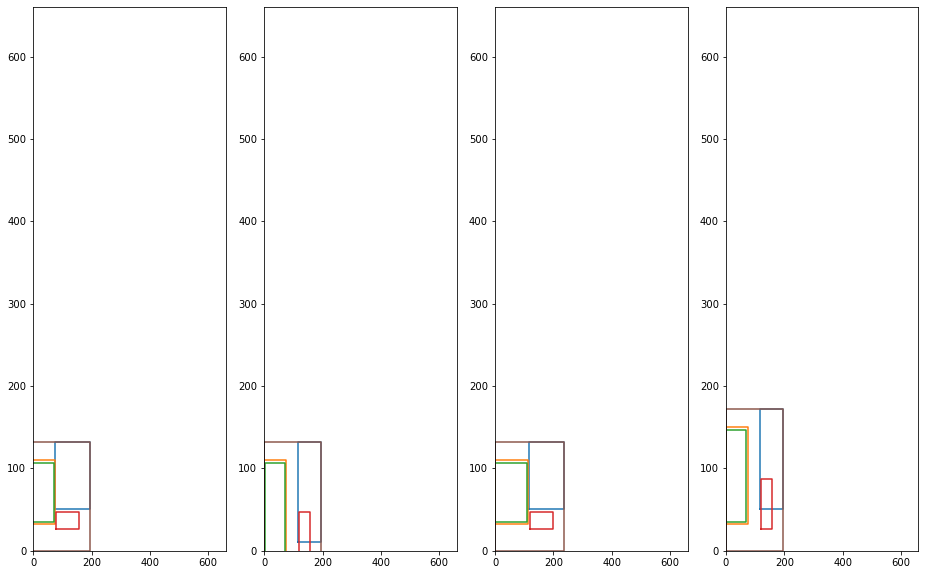

New scaling function


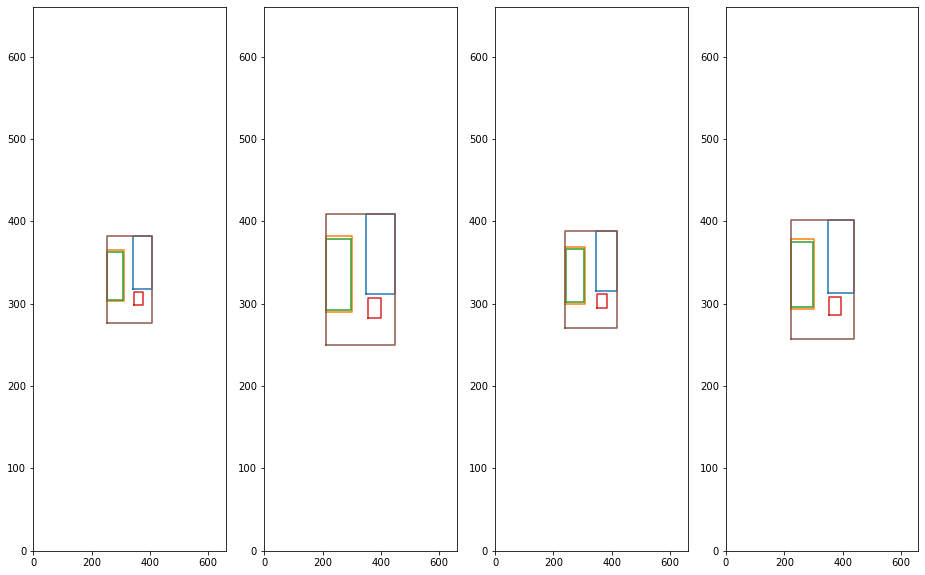

In [68]:
print("Old scaling function")
plot_all_boxes(scale_old(o_bbx[100], 40))
print("New scaling function")
plot_all_boxes(scale(o_bbx[100], 0.20))


In [70]:
o_bbx[10]

array([[ 14.,  63.,  59., 154.],
       [ 58.,  58.,  80., 145.],
       [ 39.,  24.,  70.,  45.],
       [  0.,   0.,  80.,  37.],
       [ 47., 105.,  56., 128.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,  80., 154.]], dtype=float32)

Old centering function


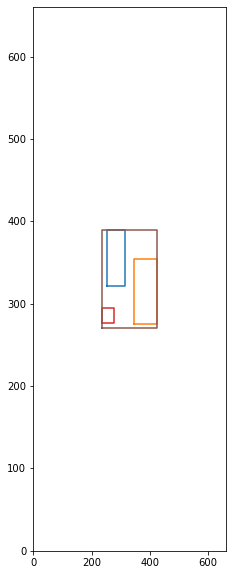

New centering function


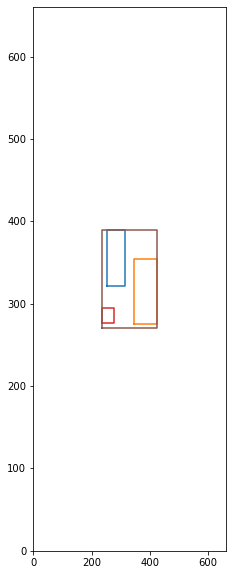

In [41]:
print("Old centering function")
plot_all_boxes([centre_object(o_bbx[70], (canvas_size, canvas_size))])
print("New centering function")
plot_all_boxes([centre_object_old(o_bbx[70], (canvas_size, canvas_size))])


In [29]:
centre_object(o_bbx[10], (canvas_size, canvas_size)).shape

(16, 4)